In [25]:
import pandas as pd
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
import seaborn as sns
ps=PorterStemmer()
wl=WordNetLemmatizer()
import numpy as np

In [2]:
data=pd.read_csv("news_articles.csv")
data.head()
data=data.dropna(axis=0)
data.reset_index(inplace=True)
data.head()

,index,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(Fake    1291
 Real     754
 Name: label, dtype: int64,
 0       print pay back money plus interest entire fami...
 1       attorney general loretta lynch plead fifth bar...
 2       red state fox news sunday reported morning ant...
 3       email kayla mueller prisoner tortured isis cha...
 4       email healthcare reform make america great sin...
                               ...                        
 2040    check hillarythemed haunted house anticlinton ...
 2041    good samaritan wearing indian headdress disarm...
 2042    skype sex scam fortune built shame moroccan bo...
 2043    posted eddie skyhigh potency may scare away cr...
 2044    billion even known keeping supposedly deleted ...
 Length: 2045, dtype: object)

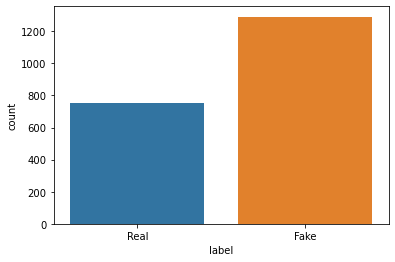

In [39]:
x=data['text_without_stopwords']+' '+data['title_without_stopwords']
y=data['label']


x.shape,y.shape

sns.countplot(data['label'])
data['label'].value_counts(),x

In [40]:
k=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z]',' ',str(x[i]))
    review=review.split()
    review=[wl.lemmatize(word) for word in review]
    review=" ".join(review)
    k.append(review)


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
voc=10000

In [63]:
oh=[one_hot(word,voc)for word in k]
pad=pad_sequences(oh,padding='pre',maxlen=15)
X=pad
y=np.array(y)
X.shape,y.shape

((2045, 15), (2045,))

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
model=Sequential()

model.add(Embedding(voc,20,input_length=15))
model.add(Dropout(0.2))
model.add(LSTM(30))
#model.add(Dropout(0.2))
model.add(Dense(1,'sigmoid',))
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 15, 20)            200000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 20)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                6120      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 206,151
Trainable params: 206,151
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_data=(X_train,y_train),epochs=20,batch_size=32)

Epoch 1/20
52/52 [==============================] - 1s 13ms/step - loss: 0.1748 - accuracy: 0.9480 - val_loss: 0.0609 - val_accuracy: 0.9902
Epoch 2/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.0089 - val_accuracy: 0.9982
Epoch 3/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0105 - accuracy: 0.9982 - val_loss: 0.0038 - val_accuracy: 0.9988
Epoch 4/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/20
52

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [62]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy_score(y_pred,y_test)


0.6992665036674817